In [3]:
# ----------------------------------------------------------------------------
#
# TITLE - Lab4_Preparation
# AUTHOR - James
# PROJECT - AST 2050 Lab 4
#
# ----------------------------------------------------------------------------
#
# Docstrings and metadata:
'''Preparations for Lab 4
'''

__author__ = "James Lane"

In [4]:
### Imports

## Basic
import numpy as np
import sys, os, pdb

## Plotting
from matplotlib import pyplot as plt

In [5]:
# Matplotlib for notebooks
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# $\Delta \lambda$ Considerations 

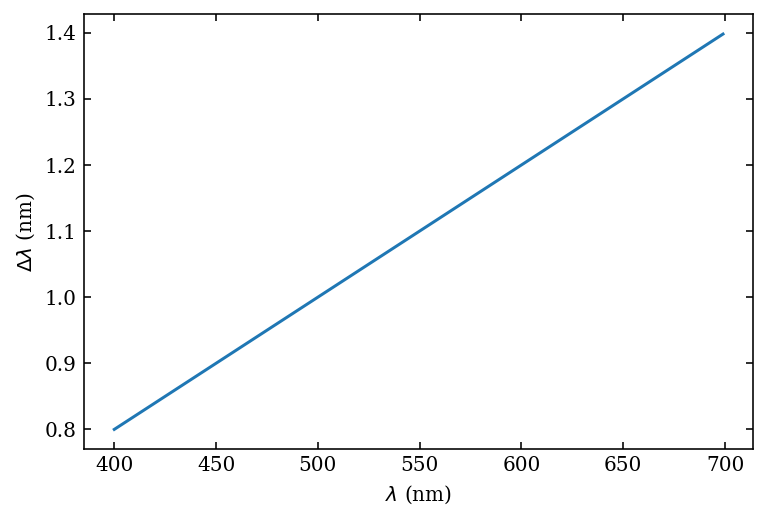

In [6]:
wavelengths = np.arange(400,700) # nm
R = 500
plt.plot( wavelengths, wavelengths / R )
plt.xlabel(r'$\lambda$ (nm)')
plt.ylabel(r'$\Delta \lambda$ (nm)')
plt.show()

We know the equation for the linear dispersion of the system:

$
\frac{ d \lambda }{ d x } = \frac{ \sigma \cos \beta }{ m } \frac{ 1 }{ f_{cm} }
$

Assuming we want the term on the left to be 1/2: i.e. 1 $\delta \lambda$ per pixel size

In [7]:
(1/600) * np.cos(np.pi/4) * 0.00375 / 25 * 1E9

176.7766952966369

# April 5

In [50]:
def R_slit_limited(alpha,beta,delta_s,f_col=35):
    return (np.sin(alpha)+np.sin(beta))/(np.cos(beta))*(f_col/delta_s)
#def

def R_diffraction_limited(beta,m,N):
    return m*N/np.cos(beta)
#def

def calculate_beta(m,wavelength,groove_spacing,alpha):
    return np.arcsin( np.sin(alpha) - (m*wavelength)/(groove_spacing) )
#def

In [69]:
groove_density = 600 # Grooves per mm, sigma
groove_spacing = 1/groove_density # Size per groove
beam_diameter = 9 # mm
delta_s_mm = 50.0E-3 # mm
delta_s_sm = 8.2E-3 # mm
alpha = np.arange( np.pi/12, np.pi/6, 0.01 )
wavelength = np.arange( 400.0E-6, 700.0E-6, 50.0E-6 )
N = beam_diameter * groove_density * np.cos(alpha)

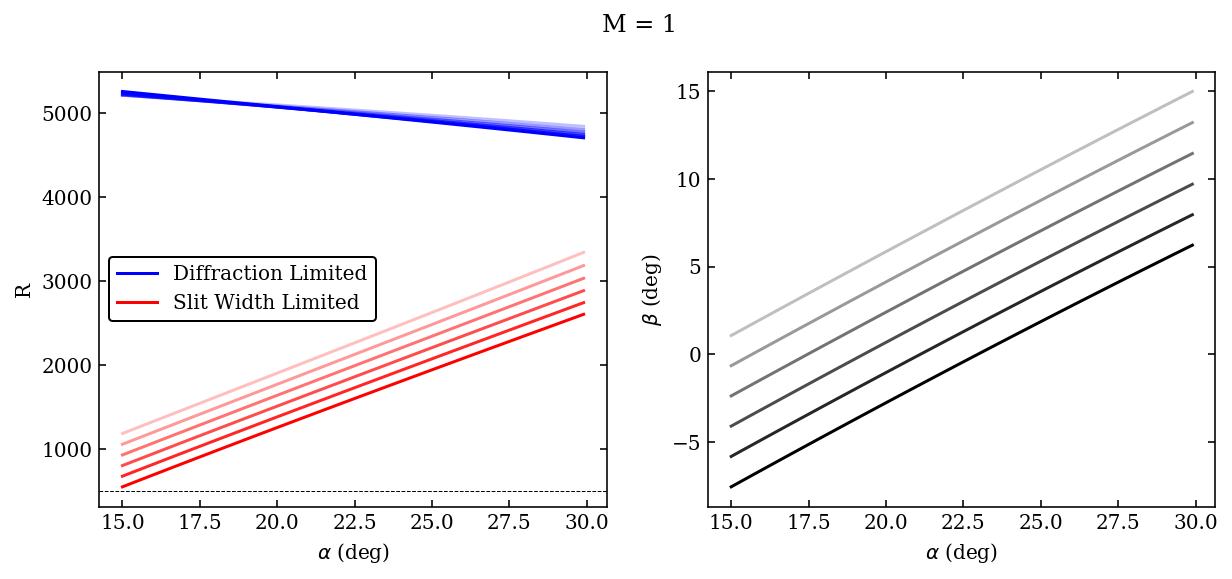

In [70]:
m=1

fig = plt.figure( figsize=(10,4) )
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i in range( len(wavelength) ):

    beta = calculate_beta(m,wavelength[i],groove_spacing,alpha)
    R_diff = R_diffraction_limited(beta,m,N)
    R_slit = R_slit_limited(alpha,beta,delta_s_sm)
    
    
    ax1.plot( alpha*180/np.pi, R_diff, color='Blue', alpha = 0.25+i*0.15)
    ax1.plot( alpha*180/np.pi, R_slit, color='Red', alpha = 0.25+i*0.15)

    ax2.plot( alpha*180/np.pi, beta*180/np.pi, color='Black', alpha = 0.25+i*0.15 )

    
ax1.plot( [], [] , color='Blue', label='Diffraction Limited' )
ax1.plot( [], [] , color='Red', label='Slit Width Limited' )
ax1.set_xlabel(r'$\alpha$ (deg)')
ax1.set_ylabel('R')
# ax1.set_ylim(0,2000)

ax1.axhline(500, color='Black', linestyle='dashed', lw=0.5)
ax2.set_xlabel(r'$\alpha$ (deg)')
ax2.set_ylabel(r'$\beta$ (deg)')

fig.suptitle('M = '+str(m))

ax1.legend()

plt.show()

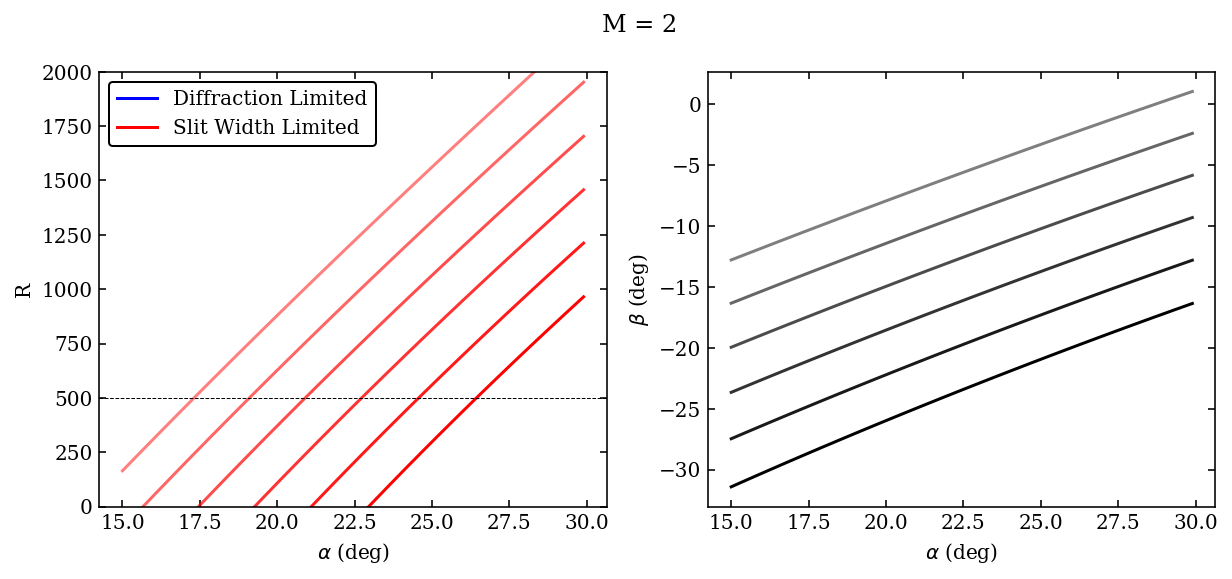

In [71]:
m=2

fig = plt.figure( figsize=(10,4) )
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i in range( len(wavelength) ):

    beta = calculate_beta(m,wavelength[i],groove_spacing,alpha)
    R_diff = R_diffraction_limited(beta,m,N)
    R_slit = R_slit_limited(alpha,beta,delta_s_sm)
    
    
    ax1.plot( alpha*180/np.pi, R_diff, color='Blue', alpha = 0.5+i*0.1)
    ax1.plot( alpha*180/np.pi, R_slit, color='Red', alpha = 0.5+i*0.1)

    ax2.plot( alpha*180/np.pi, beta*180/np.pi, color='Black', alpha = 0.5+i*0.1 )

    
ax1.plot( [], [] , color='Blue', label='Diffraction Limited' )
ax1.plot( [], [] , color='Red', label='Slit Width Limited' )
ax1.set_xlabel(r'$\alpha$ (deg)')
ax1.set_ylabel('R')
ax1.set_ylim(0,2000)
ax1.axhline(500, color='Black', linestyle='dashed', lw=0.5)
ax1.legend()

ax2.set_xlabel(r'$\alpha$ (deg)')
ax2.set_ylabel(r'$\beta$ (deg)')

fig.suptitle('M = '+str(m))

plt.show()

In [72]:
def linear_dispersion(groove_spacing, beta, m, f_cam=25):
    return (groove_spacing*np.cos(beta))/(m*f_cam)
#def

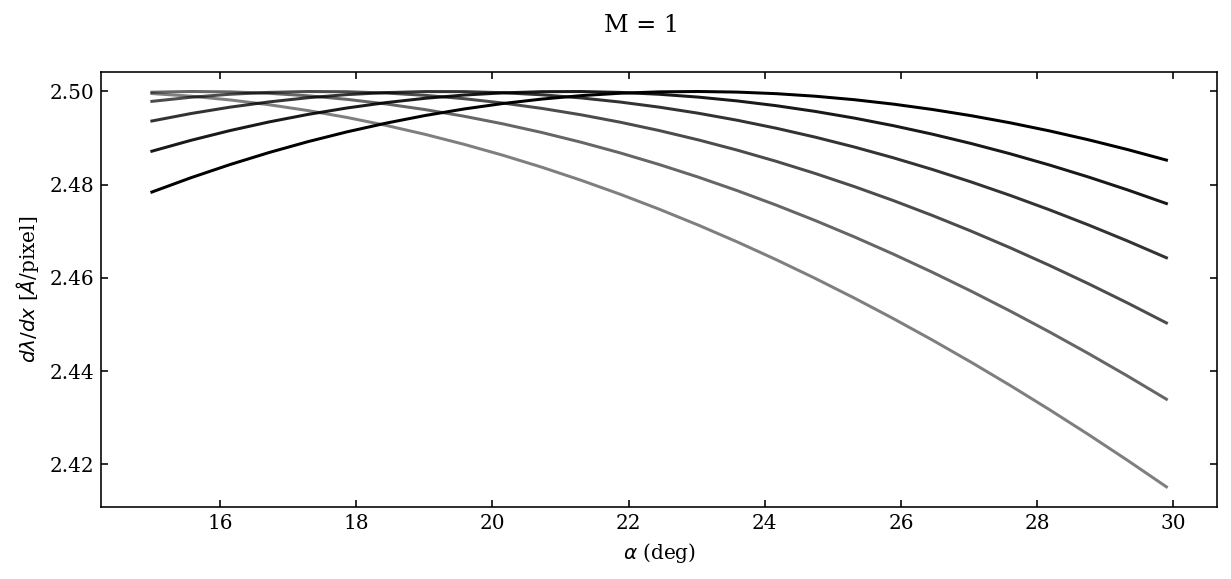

In [83]:
m = 1

fig = plt.figure( figsize=(10,4) )
ax1 = fig.add_subplot(111)

for i in range( len(wavelength) ):

    beta = calculate_beta(m,wavelength[i],groove_spacing,alpha)
    ld = linear_dispersion(groove_spacing, beta, m) * 10**7 * (3.75E-3)
    
    ax1.plot( alpha*180/np.pi, ld, color='Black', alpha = 0.5+i*0.1)
###i

ax1.set_xlabel(r'$\alpha$ (deg)')
ax1.set_ylabel(r'$d\lambda/dx$ [$\AA$/pixel]')
fig.suptitle('M = '+str(m))

plt.show()

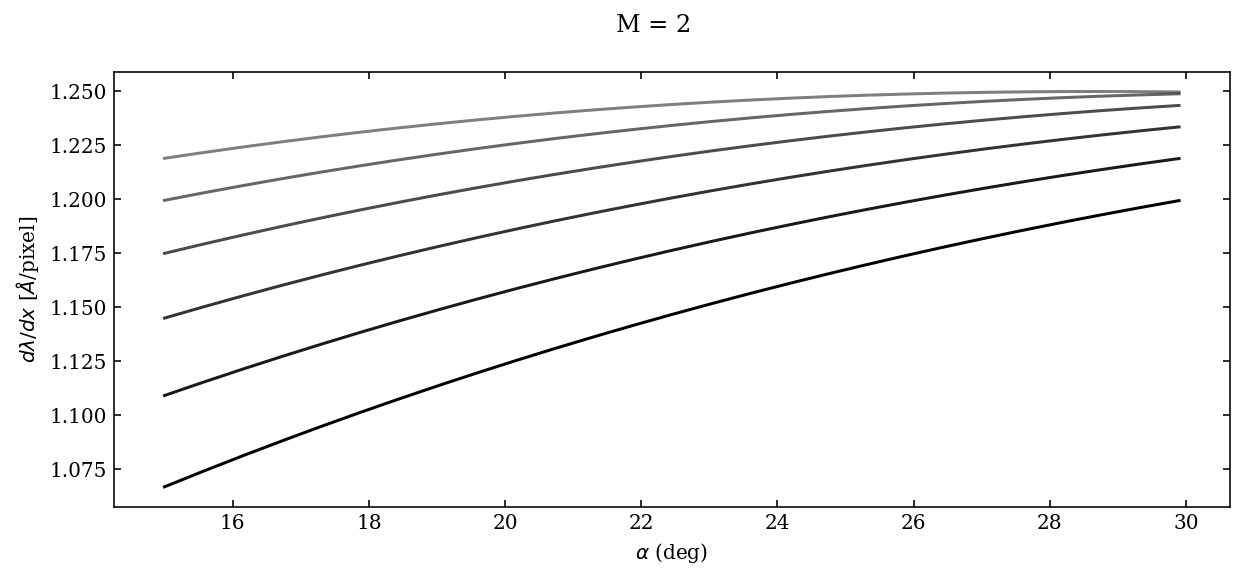

In [84]:
m = 2

fig = plt.figure( figsize=(10,4) )
ax1 = fig.add_subplot(111)

for i in range( len(wavelength) ):

    beta = calculate_beta(m,wavelength[i],groove_spacing,alpha)
    ld = linear_dispersion(groove_spacing, beta, m) * 10**7 * (3.75E-3)
    
    ax1.plot( alpha*180/np.pi, ld, color='Black', alpha = 0.5+i*0.1)
###i

ax1.set_xlabel(r'$\alpha$ (deg)')
ax1.set_ylabel(r'$d\lambda/dx$ [$\AA$/pixel]')
fig.suptitle('M = '+str(m))

plt.show()